In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data dictionary
df_dict = pd.read_excel('variable description.xlsx')
df_dict

,variable,description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type
3,trestbps,resting blood pressure (in mm Hg on admission...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to...


In [3]:
# import the data
df = pd.read_excel('data.xlsx')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# finding the structure of the data 
df.shape

(303, 14)

In [7]:
# the findings on the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# cheking the null values
df.isna().sum()

# Observation: From the result below, we can conclude that there are no null values in the dataset.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# we can assume a column to be categorical if number of unique value is below 10.
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
# findings the duplicate value in the data
df.duplicated().sum()

# There is 1 duplicated value in the data. 

1

In [11]:
# removing the duplicate value
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# we can assume a column to be categorical if number of unique value is 5 or less.
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [15]:
print(df.sex.value_counts()),
print(df.sex.value_counts(normalize=True)*100)

1    206
0     96
Name: sex, dtype: int64
1    68.211921
0    31.788079
Name: sex, dtype: float64


In [16]:
for i in ['sex', 'cp', 'fbs', 'ca', 'restecg', 'exang', 'slope', 'thal']:
    
    print(i,"\n",df[i].value_counts(normalize=True)*100, "\n")

sex 
 1    68.211921
0    31.788079
Name: sex, dtype: float64 

cp 
 0    47.350993
2    28.476821
1    16.556291
3     7.615894
Name: cp, dtype: float64 

fbs 
 0    85.099338
1    14.900662
Name: fbs, dtype: float64 

ca 
 0    57.947020
1    21.523179
2    12.582781
3     6.622517
4     1.324503
Name: ca, dtype: float64 

restecg 
 1    50.000000
0    48.675497
2     1.324503
Name: restecg, dtype: float64 

exang 
 0    67.218543
1    32.781457
Name: exang, dtype: float64 

slope 
 2    46.688742
1    46.357616
0     6.953642
Name: slope, dtype: float64 

thal 
 2    54.635762
3    38.741722
1     5.960265
0     0.662252
Name: thal, dtype: float64 



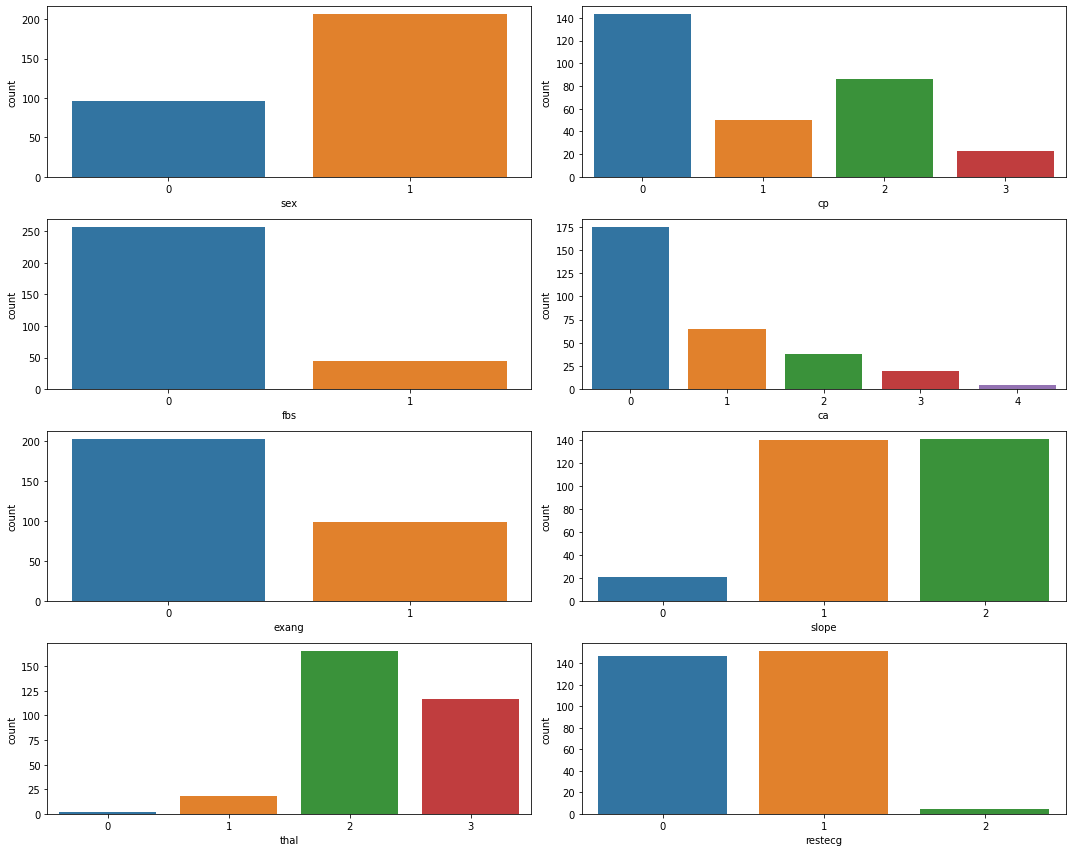

In [17]:
# Plotting the categorical variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
sns.countplot(x='sex', data=df, ax=axes[0][0])
sns.countplot(x='cp', data=df, ax=axes[0][1])
sns.countplot(x='fbs', data=df, ax=axes[1][0])
sns.countplot(x='ca', data=df, ax=axes[1][1])
sns.countplot(x='exang', data=df, ax=axes[2][0])
sns.countplot(x='slope', data=df, ax=axes[2][1])
sns.countplot(x='thal', data=df, ax=axes[3][0])
sns.countplot(x='restecg', data=df, ax=axes[3][1])

plt.tight_layout()
plt.show()

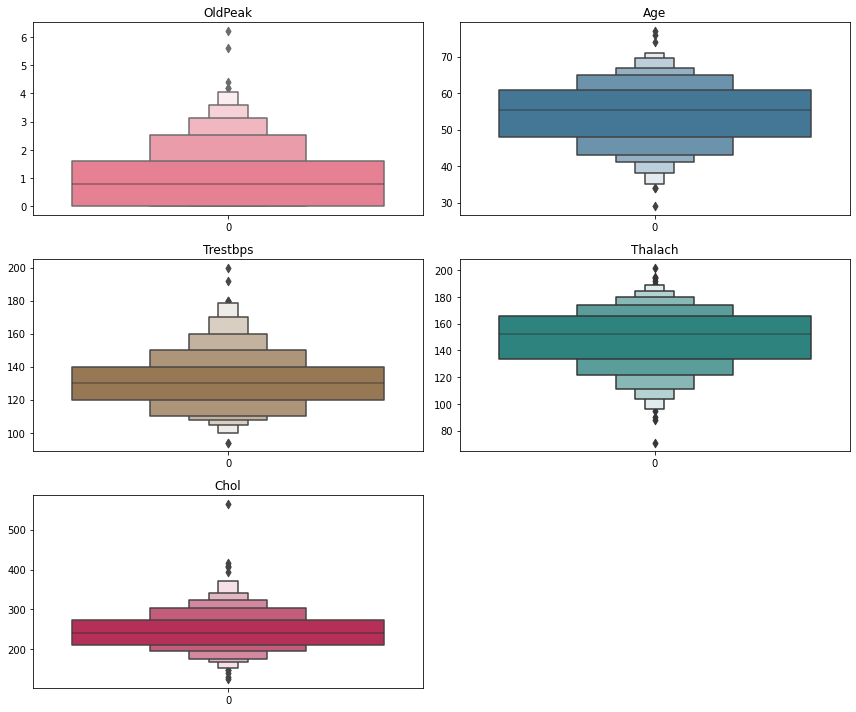

In [18]:
## Plotting box plot of continuous features

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
sns.boxenplot(df['oldpeak'], palette='husl', ax=axes[0][0]).set_title('OldPeak', fontsize=12)
sns.boxenplot(df['age'], palette='mako', ax=axes[0][1]).set_title('Age', fontsize=12)
sns.boxenplot(df['trestbps'], palette='cubehelix', ax=axes[1][0]).set_title('Trestbps', fontsize=12)
sns.boxenplot(df['thalach'], palette='viridis', ax=axes[1][1]).set_title('Thalach', fontsize=12)
sns.boxenplot(df['chol'], palette='rocket_r', ax=axes[2][0]).set_title('Chol', fontsize=12)

fig.delaxes(axes[2][1])
plt.tight_layout()
plt.show()

##### Observations:
* There are certain outliers in all the continuous features.

In [19]:
# Study the occurence of CVD across the Age category

# pd.cut --> creates bucket of the values of that columns, analyzing the CVD columns using age

df.groupby([pd.cut(df['age'], 5)])['target'].mean()

age
(28.952, 38.6]    0.727273
(38.6, 48.2]      0.704225
(48.2, 57.8]      0.577320
(57.8, 67.4]      0.377358
(67.4, 77.0]      0.588235
Name: target, dtype: float64

In [20]:
df.groupby([pd.cut(df['age'], 5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
"(28.952, 38.6]",11.0,0.727273,0.467099,0.0,0.5,1.0,1.0,1.0
"(38.6, 48.2]",71.0,0.704225,0.459639,0.0,0.0,1.0,1.0,1.0
"(48.2, 57.8]",97.0,0.577320,0.496552,0.0,0.0,1.0,1.0,1.0
"(57.8, 67.4]",106.0,0.377358,0.487029,0.0,0.0,0.0,1.0,1.0
"(67.4, 77.0]",17.0,0.588235,0.507300,0.0,0.0,1.0,1.0,1.0


##### Observations: 
* The above output provides insights into how CVD is distributed across different age groups.

* The age group (28.952, 38.6] has a mean of 0.75, indicating that 75% of individuals in this age group have CVD. This group has the highest mean CVD probability among the age groups.

* The age group (38.6, 48.2] also has a relatively high mean CVD probability of 0.704, with a similar pattern of 75% of individuals having CVD.

* As age increases, the mean CVD probability decreases:

    * The age group (48.2, 57.8] has a mean of 0.577.
    * The age group (57.8, 67.4] has a lower mean of 0.377.
    * The age group (67.4, 77.0] sees a slight increase in the mean to 0.588.

In [21]:
## Study the composition of overall patients w.r.t . gender.

df.sex.value_counts(normalize=True)*100

# Observations: from the below result we see 68.21% are male and 31.79% are female.

1    68.211921
0    31.788079
Name: sex, dtype: float64

In [22]:
print(df.groupby(['sex'])['target'].mean(),'\n')

# more detailed
print(df.groupby(['sex'])['target'].describe())

# Observations:
# 1. From the below result, we see that out of 96 female, 75% have Heart diseases.
# 2. And Out of 206 male, 44.66% have heart diseases.

sex
0    0.750000
1    0.446602
Name: target, dtype: float64 

     count      mean       std  min   25%  50%  75%  max
sex                                                     
0     96.0  0.750000  0.435286  0.0  0.75  1.0  1.0  1.0
1    206.0  0.446602  0.498352  0.0  0.00  0.0  1.0  1.0


In [23]:
## Heart attack based on anomalies in the resting blood pressure of the patient.

df.groupby([pd.cut(df['trestbps'], 5)])['target'].mean()

trestbps
(93.894, 115.2]    0.615385
(115.2, 136.4]     0.560284
(136.4, 157.6]     0.530120
(157.6, 178.8]     0.380952
(178.8, 200.0]     0.200000
Name: target, dtype: float64

In [24]:
## more detailed view of the above

df.groupby([pd.cut(df['trestbps'], 5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
trestbps,,,,,,,,
"(93.894, 115.2]",52.0,0.615385,0.491251,0.0,0.0,1.0,1.0,1.0
"(115.2, 136.4]",141.0,0.560284,0.498122,0.0,0.0,1.0,1.0,1.0
"(136.4, 157.6]",83.0,0.530120,0.502126,0.0,0.0,1.0,1.0,1.0
"(157.6, 178.8]",21.0,0.380952,0.497613,0.0,0.0,0.0,1.0,1.0
"(178.8, 200.0]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


##### Observations:
* On the basis of above result, it appears that as blood pressure ('trestbps') increases, the mean of the 'target' variable decreases. This suggests that there may be a trend where lower blood pressure values are associated with a higher probability of the target event (higher likelihood of a heart disease diagnosis) or vice-versa.

However, it's important to note that these findings are based on the data provided and may not necessarily imply causation. Further analysis and domain knowledge may be needed to draw meaningful conclusions.

In [25]:
## describing the relationship between Cholesterol levels and our target variable.

df.groupby([pd.cut(df['chol'], 5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
chol,,,,,,,,
"(125.562, 213.6]",84.0,0.607143,0.491319,0.0,0.0,1.0,1.0,1.0
"(213.6, 301.2]",175.0,0.514286,0.501230,0.0,0.0,1.0,1.0,1.0
"(301.2, 388.8]",38.0,0.526316,0.506009,0.0,0.0,1.0,1.0,1.0
"(388.8, 476.4]",4.0,0.500000,0.577350,0.0,0.0,0.5,1.0,1.0
"(476.4, 564.0]",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


##### Observations:
On the basis of above result,
* The mean value of the 'target' variable tends to decrease as cholesterol levels ('chol') increase. This suggests that lower cholesterol levels are associated with a higher probability of the target event (higher likelihood of a heart disease diagnosis).

* There is variability in the 'target' values within each cholesterol range, as indicated by the standard deviation ('std').

* It's interesting to note that the highest mean value (1.0) is in the (476.4, 564.0] cholesterol range, but this range has only one data point, which means it may not be representative and should be interpreted with caution. The high mean could be due to the presence of a single individual with a heart disease diagnosis in this range.

However, it's important to note that these findings are based on the data provided and may not necessarily imply causation. Further analysis and domain knowledge may be needed to draw meaningful conclusions.

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


##### Observations:

**Correlation with the 'target' feature:**

* The most relevant feature to predict the 'target' (heart disease) is 'cp' (chest pain type) with a positive correlation of 0.432080. This suggests that as the value of 'cp' increases, the likelihood of having heart disease (positive 'target') also increases. Chest pain type may be a strong indicator of heart disease.

* 'thalach' (maximum heart rate achieved) is positively correlated with 'target' at 0.419955. This indicates that as 'thalach' increases, the likelihood of having heart disease increases. A higher maximum heart rate achieved may be associated with a higher risk of heart disease.

* 'exang' (exercise-induced angina) has a negative correlation of -0.435601 with 'target,' suggesting that the presence of exercise-induced angina is associated with a lower likelihood of having heart disease.

**Features with notable correlations:**

* 'slope' and 'restecg' (resting electrocardiographic results) have positive correlations with 'target' but are relatively weaker compared to 'cp' and 'thalach.' This suggests that it may be associated with a slightly increased likelihood of heart disease.

* 'oldpeak' (ST depression induced by exercise relative to rest) has a negative correlation with 'target,' indicating that as 'oldpeak' increases, the likelihood of heart disease decreases.

* 'ca' (number of major vessels colored by fluoroscopy) is negatively correlated with 'target,' meaning that as the number of major vessels increases, the likelihood of heart disease decreases.


Above findings suggest that 'cp,' 'thalach,' 'exang,' 'ca,' and 'oldpeak' are among the most important features for predicting heart disease in this dataset. The correlations provide insights into the relationships between these features and the likelihood of heart disease, but it's important to remember that correlation does not imply causation. Further analysis, including machine learning models, may be necessary to make accurate predictions and draw actionable conclusions.


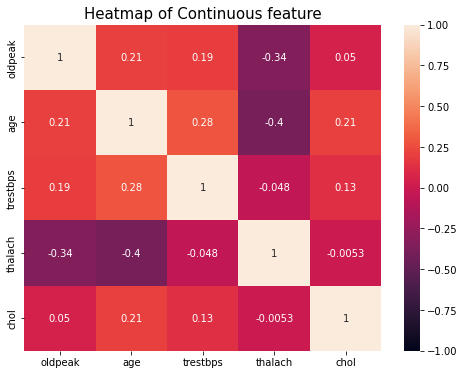

In [27]:
## Heatmap of continuous feature

plt.figure(figsize=(8,6))
sns.heatmap(df[['oldpeak', 'age', 'trestbps', 'thalach', 'chol']].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Heatmap of Continuous feature', fontsize=15)
plt.show()

##### Observations:
* The heatmap of continuous variable do show some correlations, but these correlations are generally weak to moderate.

* The heatmap indicates that there are no strong linear correlations (either positive or negative) between these variables. The correlation coefficients are all relatively close to zero, which suggests that there are no prominent linear patterns or strong linear relationships among these variables.



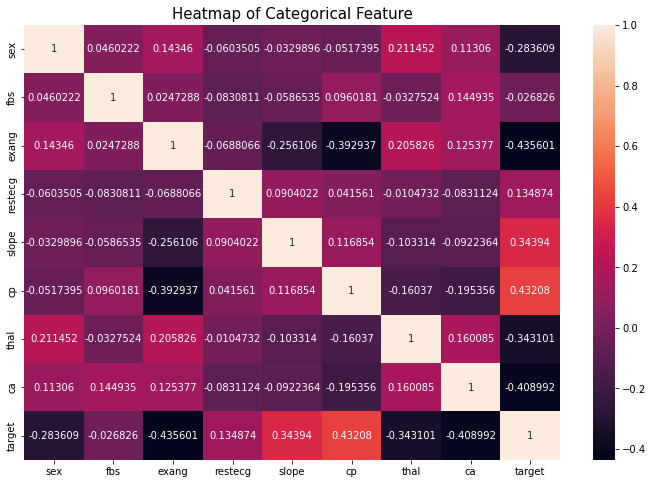

In [28]:
## Heatmap of Categorical features.
plt.figure(figsize=(12,8))
sns.heatmap(df[['sex', 'fbs', 'exang', 'restecg', 'slope', 'cp', 'thal', 'ca', 'target']].corr(), fmt='g', annot=True)
plt.title('Heatmap of Categorical Feature', fontsize=15)
plt.show()

In [29]:
## describing the relationship between peak exercising and the occurrence of a heart attack.

df.groupby([pd.cut(df['slope'],3)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
"(-0.002, 0.667]",21.0,0.428571,0.507093,0.0,0.0,0.0,1.0,1.0
"(0.667, 1.333]",140.0,0.350000,0.478682,0.0,0.0,0.0,1.0,1.0
"(1.333, 2.0]",141.0,0.751773,0.433524,0.0,1.0,1.0,1.0,1.0


##### Observations:
CVD probability varies among the 'slope' categories:
* The 'slope' category (-0.002, 0.667] has a mean CVD probability of approximately 0.429.
* The 'slope' category (0.667, 1.333] has a lower mean CVD probability of approximately 0.350.
* The 'slope' category (1.333, 2.0] has the highest mean CVD probability of approximately 0.752.

* Standard deviation (std) values indicate the variability of CVD prevalence within each 'slope' category.

The 'slope' variable appears to be associated with the likelihood of cardiovascular disease, with higher 'slope' values indicating a higher probability of CVD.

In [58]:
## Is thalassemia a major cause of CVD?

df.groupby(['thal'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
thal,,,,,,,,
0,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
1,18.0,0.333333,0.485071,0.0,0.00,0.0,1.00,1.0
2,165.0,0.781818,0.414269,0.0,1.00,1.0,1.00,1.0
3,117.0,0.239316,0.428501,0.0,0.00,0.0,0.00,1.0


##### Obseravtions:
* The 'mean' values represent the average probability of having cardiovascular disease (CVD) within each 'thal' category.
* The first category, with 'thal' values 0, has a mean of approximately 0.50, indicating a relatively moderate likelihood of CVD.
* The second category, with 'thal' values 1, has a mean of approximately 0.33, indicating a relatively lower likelihood of CVD.
* The third category, with 'thal' values 2, has the highest mean of about 0.78, suggesting a higher likelihood of CVD.
* The fourth category, with 'thal' values 3, has a lower mean of approximately 0.24, indicating a lower likelihood of CVD.

In summary, the 'thal' variable appears to be associated with the likelihood of cardiovascular disease, with 'thal' values of 2, having the highest probability of CVD and values 3.0, having the lowest probability.

In [57]:
## checking relationship between chest pain type('cp') and the occurrence of a heart attack.
df.groupby(['cp'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
cp,,,,,,,,
0,143.0,0.272727,0.446927,0.0,0.0,0.0,1.0,1.0
1,50.0,0.820000,0.388088,0.0,1.0,1.0,1.0,1.0
2,86.0,0.790698,0.409197,0.0,1.0,1.0,1.0,1.0
3,23.0,0.695652,0.470472,0.0,0.0,1.0,1.0,1.0


In [56]:
## checking relationship between number of major vessels('ca') and the occurrence of a heart attack.
df.groupby(['ca'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
ca,,,,,,,,
0,175.0,0.742857,0.438313,0.0,0.00,1.0,1.0,1.0
1,65.0,0.323077,0.471291,0.0,0.00,0.0,1.0,1.0
2,38.0,0.184211,0.392859,0.0,0.00,0.0,0.0,1.0
3,20.0,0.150000,0.366348,0.0,0.00,0.0,0.0,1.0
4,4.0,0.750000,0.500000,0.0,0.75,1.0,1.0,1.0


In [32]:
## checking relationship between maximum heart rate achieved('thalach') and the occurrence of a heart attack.

df.groupby([pd.cut(df['thalach'], 5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
thalach,,,,,,,,
"(70.869, 97.2]",7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
"(97.2, 123.4]",37.0,0.297297,0.463373,0.0,0.0,0.0,1.0,1.0
"(123.4, 149.6]",88.0,0.352273,0.480416,0.0,0.0,0.0,1.0,1.0
"(149.6, 175.8]",139.0,0.676259,0.469595,0.0,0.0,1.0,1.0,1.0
"(175.8, 202.0]",31.0,0.870968,0.340777,0.0,1.0,1.0,1.0,1.0


##### Observations:
On the basis of above result,
* It appears that as maximum heart rate (thalach) increases, the likelihood of the presence of cardiovascular disease ('target' = 1) also tends to increase.

* The trend is evident as you move from lower thalach ranges to higher ones. For example, the group with thalach in the range of (175.8, 202.0] has the highest mean target value (0.871), indicating a relatively high presence of cardiovascular disease.

* This suggests that maximum heart rate achieved (thalach) is a potential factor associated with cardiovascular disease, and higher heart rates may be correlated with a higher risk of the disease.


In [52]:
## relationship between ('oldpeak') and the occurrence of a heart attack.

df.groupby([pd.cut(df['oldpeak'], 3)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
oldpeak,,,,,,,,
"(-0.0062, 2.067]",252.0,0.623016,0.485595,0.0,0.0,1.0,1.0,1.0
"(2.067, 4.133]",45.0,0.133333,0.343776,0.0,0.0,0.0,0.0,1.0
"(4.133, 6.2]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


In [59]:
## relationship between exercise induced angina('exang') and the occurrence of a heart attack.

df.groupby(['exang'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
exang,,,,,,,,
0,203.0,0.694581,0.461723,0.0,0.0,1.0,1.0,1.0
1,99.0,0.232323,0.424463,0.0,0.0,0.0,0.0,1.0


##### Observations:
* People with no exercise induced angina i.e. (exang=0) has the highest mean of about 0.694, indicating the higher chance of heart attacks.

In [33]:
## checking relationship between fasting blood sugar('fbs') and the occurrence of a heart attack.

df.groupby([pd.cut(df['fbs'], 2)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
fbs,,,,,,,,
"(-0.001, 0.5]",257.0,0.548638,0.498600,0.0,0.0,1.0,1.0,1.0
"(0.5, 1.0]",45.0,0.511111,0.505525,0.0,0.0,1.0,1.0,1.0


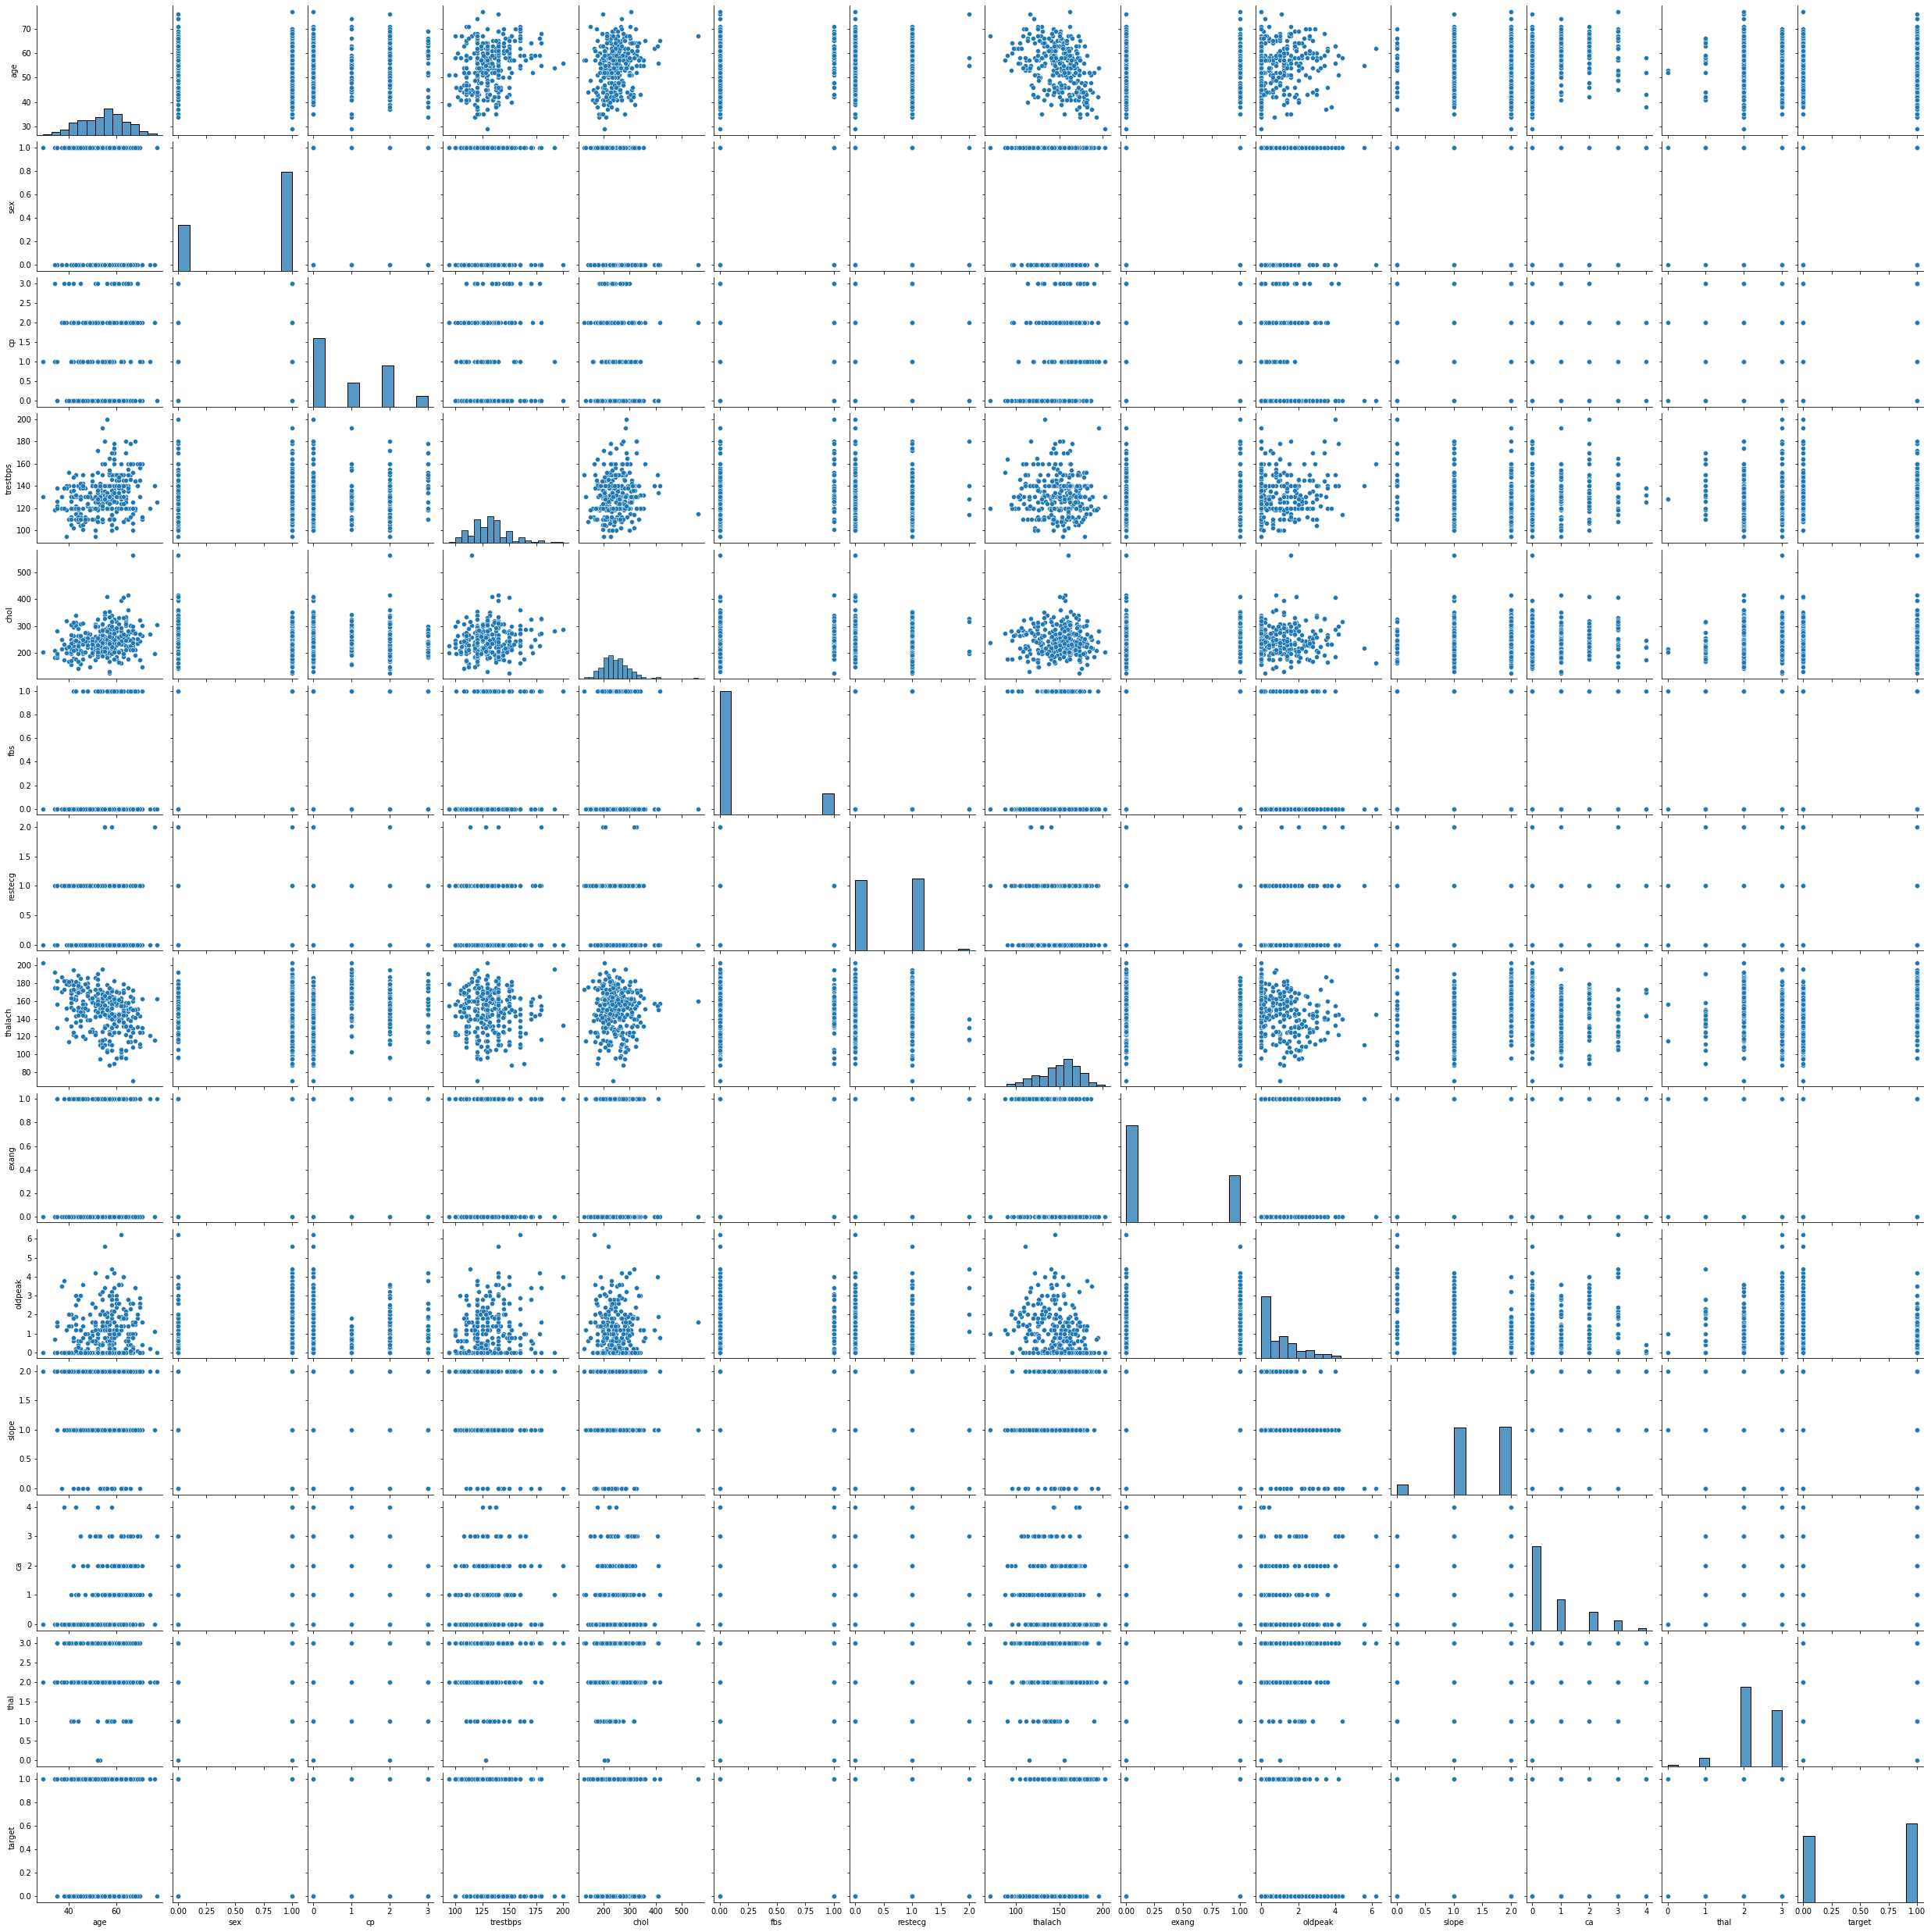

In [34]:
## pair plot to understand the relationship between all the given variables.

sns.pairplot(df)
plt.show()

###  Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
# Split the data features & Label.
X = df.drop('target', axis=1) # feature
y = df[['target']]            # Label

In [38]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [39]:
y.head(2)

,target
0,1
1,1


In [40]:
# Split into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

#### Logistic Regression:

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# fit the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# predict the model
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [43]:
lr_model.score(X_test, y_test)

0.8524590163934426

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.8524590163934426

In [45]:
# Confusion Matrix
lr_cm = confusion_matrix(y_test, y_pred)
lr_cm

array([[24,  5],
       [ 4, 28]])

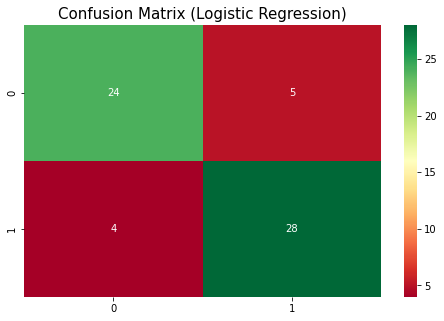

In [46]:
# plot the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(lr_cm, annot=True, cmap='RdYlGn')
plt.title('Confusion Matrix (Logistic Regression)', fontsize=15)
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [48]:
# Using Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, criterion='gini',random_state=42)
print(rfc)
rfc.fit(X_train, y_train)

print('\nScore:',rfc.score(X_test, y_test))

rfc_pred = rfc.predict(X_test)
print('\nPredictions:', rfc_pred)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
print('\nAccuracy Score:', rfc_accuracy)

rfc_cm = confusion_matrix(y_test, rfc_pred)
print('\nConfusion Matrix:\n', rfc_cm)

print('\n\nClassification Report:\n\n', classification_report(y_test, rfc_pred))

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

Score: 0.9180327868852459

Predictions: [0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]

Accuracy Score: 0.9180327868852459

Confusion Matrix:
 [[27  2]
 [ 3 29]]


Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

